In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd/content/gdrive/MyDrive/XB00036

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/gdrive
/content/gdrive/MyDrive/XB00036


In [ ]:
import pandas as pd
train_df = pd.read_csv('./data/titanic_train.csv')
test_df = pd.read_csv('./data/titanic_test.csv')

train_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [ ]:
test_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,3,0,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S,NaN,NaN
1,2,1,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0000,NaN,S,NaN,"Ilfracombe, Devon"
2,2,0,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,NaN,S,NaN,London
3,3,0,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN
4,2,0,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5000,NaN,S,NaN,"Guernsey / Elizabeth, NJ"


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     393 non-null    int64  
 1   survived   393 non-null    int64  
 2   name       393 non-null    object 
 3   sex        393 non-null    object 
 4   age        305 non-null    float64
 5   sibsp      393 non-null    int64  
 6   parch      393 non-null    int64  
 7   ticket     393 non-null    object 
 8   fare       393 non-null    float64
 9   cabin      81 non-null     object 
 10  embarked   393 non-null    object 
 11  body       36 non-null     float64
 12  home.dest  218 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 40.0+ KB


In [ ]:
# axis = 1 -> 열을 의미, inplace = True로 두면 결과값 다 바꿔짐
train_df.drop(['name', 'cabin', 'ticket', 'body', 'home.dest'], axis = 1, inplace=True)

In [ ]:
train_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.0,0,1,19.5000,S
1,2,1,female,4.0,1,1,23.0000,S
2,2,1,female,30.0,1,0,13.8583,C
3,3,0,male,NaN,0,0,7.7250,Q
4,3,1,female,22.0,0,0,7.7250,Q


In [ ]:
# inplace하는 두 번째 방법
test_df = test_df.drop(['name', 'cabin', 'ticket', 'body', 'home.dest'], axis = 1)
test_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,3,0,male,38.0,0,0,7.8958,S
1,2,1,female,21.0,0,1,21.0000,S
2,2,0,male,42.0,1,0,27.0000,S
3,3,0,male,NaN,0,0,14.5000,S
4,2,0,male,25.0,0,0,31.5000,S


In [ ]:
survived_count = train_df['survived'].value_counts().sort_index()
survived_count

0    563
1    353
Name: survived, dtype: int64

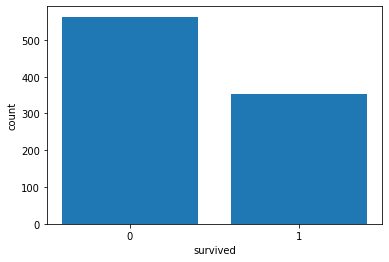

In [ ]:
import matplotlib.pyplot as plt

plt.bar(survived_count.index, survived_count.values)
plt.xticks(survived_count.index)
plt.xlabel('survived')
plt.ylabel('count')
plt.show()

1    230
2    188
3    498
Name: pclass, dtype: int64


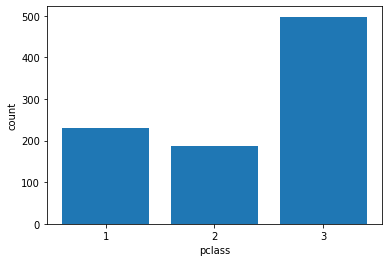

In [ ]:
pclass_count = train_df['pclass'].value_counts().sort_index()
print(pclass_count)

plt.bar(pclass_count.index, pclass_count.values)
plt.xticks(pclass_count.index)
plt.xlabel('pclass')
plt.ylabel('count')
plt.show()

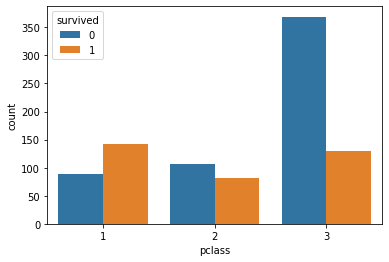

In [ ]:
import seaborn as sns

# hue : 색상구분(survived 피처를 기준으로)
sns.countplot(x = 'pclass', hue = 'survived', data = train_df)
plt.show()

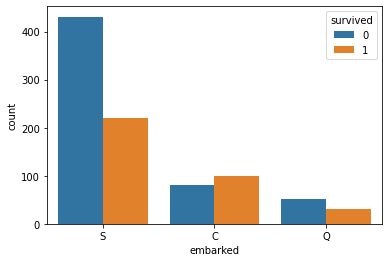

In [ ]:
sns.countplot(x = 'embarked', hue = 'survived', data = train_df)
plt.show()

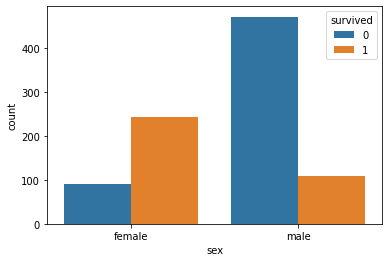

In [ ]:
sns.countplot(x = 'sex', hue = 'survived', data = train_df)
plt.show()

In [ ]:
train_df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.00,0,1,19.5000,S
1,2,1,female,4.00,1,1,23.0000,S
2,2,1,female,30.00,1,0,13.8583,C
3,3,0,male,NaN,0,0,7.7250,Q
4,3,1,female,22.00,0,0,7.7250,Q
...,...,...,...,...,...,...,...,...
911,3,1,female,0.17,1,2,20.5750,S
912,3,0,male,NaN,0,0,8.0500,S
913,3,1,female,NaN,0,0,7.7333,Q
914,2,1,female,20.00,0,0,36.7500,S


In [ ]:
# 데이터 전처리

age_mean = train_df[train_df['age'] > 0]['age'].mean()
train_df['age'] = train_df['age'].fillna(age_mean)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   sex       916 non-null    object 
 3   age       916 non-null    float64
 4   sibsp     916 non-null    int64  
 5   parch     916 non-null    int64  
 6   fare      916 non-null    float64
 7   embarked  914 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 57.4+ KB


In [ ]:
test_df['age'] = test_df['age'].fillna(age_mean)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    393 non-null    int64  
 1   survived  393 non-null    int64  
 2   sex       393 non-null    object 
 3   age       393 non-null    float64
 4   sibsp     393 non-null    int64  
 5   parch     393 non-null    int64  
 6   fare      393 non-null    float64
 7   embarked  393 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 24.7+ KB


In [ ]:
embarked_mode = train_df['embarked'].value_counts().index[0]

In [ ]:
train_df['embarked'] = train_df['embarked'].fillna(embarked_mode)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   sex       916 non-null    object 
 3   age       916 non-null    float64
 4   sibsp     916 non-null    int64  
 5   parch     916 non-null    int64  
 6   fare      916 non-null    float64
 7   embarked  916 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 57.4+ KB


In [ ]:
train_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.000000,0,1,19.5000,S
1,2,1,female,4.000000,1,1,23.0000,S
2,2,1,female,30.000000,1,0,13.8583,C
3,3,0,male,30.231444,0,0,7.7250,Q
4,3,1,female,22.000000,0,0,7.7250,Q


In [ ]:
# 데이터 전처리
# 범주형 피처 처리 (원-핫 인코딩)

data_df = train_df.append(test_df)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 392
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
 7   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 92.0+ KB


In [ ]:
train_num = len(train_df)
data_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.000000,0,1,19.5000,S
1,2,1,female,4.000000,1,1,23.0000,S
2,2,1,female,30.000000,1,0,13.8583,C
3,3,0,male,30.231444,0,0,7.7250,Q
4,3,1,female,22.000000,0,0,7.7250,Q


In [ ]:
encoded_data_df = pd.get_dummies(data_df)
encoded_data_df.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


In [ ]:
train_df = encoded_data_df[:train_num]
test_df = encoded_data_df[train_num:]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      916 non-null    int64  
 1   survived    916 non-null    int64  
 2   age         916 non-null    float64
 3   sibsp       916 non-null    int64  
 4   parch       916 non-null    int64  
 5   fare        916 non-null    float64
 6   sex_female  916 non-null    uint8  
 7   sex_male    916 non-null    uint8  
 8   embarked_C  916 non-null    uint8  
 9   embarked_Q  916 non-null    uint8  
 10  embarked_S  916 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 54.6 KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 392
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      393 non-null    int64  
 1   survived    393 non-null    int64  
 2   age         393 non-null    float64
 3   sibsp       393 non-null    int64  
 4   parch       393 non-null    int64  
 5   fare        393 non-null    float64
 6   sex_female  393 non-null    uint8  
 7   sex_male    393 non-null    uint8  
 8   embarked_C  393 non-null    uint8  
 9   embarked_Q  393 non-null    uint8  
 10  embarked_S  393 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 23.4 KB


In [ ]:
train_df.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


In [ ]:
# 행조회
train_df.loc[0]

pclass         2.0
survived       1.0
age           13.0
sibsp          0.0
parch          1.0
fare          19.5
sex_female     1.0
sex_male       0.0
embarked_C     0.0
embarked_Q     0.0
embarked_S     1.0
Name: 0, dtype: float64

In [ ]:
# 열조회
train_df.loc[:, 'survived']

0      1
1      1
2      1
3      0
4      1
      ..
911    1
912    0
913    1
914    1
915    0
Name: survived, Length: 916, dtype: int64

In [ ]:
# 1차원 배열
train_df.loc[:, 'survived'].values.shape

(916,)

In [ ]:
# 2차원 배열
train_df.loc[:, train_df.columns == 'survived'].values.shape

(916, 1)

In [ ]:
y_train = train_df.loc[:, 'survived'].values
# train_df.loc[:, train_df.columns == 'survived'].values.reshape(-1)


In [ ]:
train_df.loc[:, train_df.columns != 'survived']

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,13.000000,0,1,19.5000,1,0,0,0,1
1,2,4.000000,1,1,23.0000,1,0,0,0,1
2,2,30.000000,1,0,13.8583,1,0,1,0,0
3,3,30.231444,0,0,7.7250,0,1,0,1,0
4,3,22.000000,0,0,7.7250,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
911,3,0.170000,1,2,20.5750,1,0,0,0,1
912,3,30.231444,0,0,8.0500,0,1,0,0,1
913,3,30.231444,0,0,7.7333,1,0,0,1,0
914,2,20.000000,0,0,36.7500,1,0,0,0,1


In [ ]:
x_train = train_df.loc[:, train_df.columns != 'survived'].values

In [ ]:
x_test = test_df.loc[:, test_df.columns != 'survived'].values
x_test.shape

(393, 10)

In [ ]:
y_test = test_df.loc[:, 'survived'].values
y_test.shape

(393,)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
print(x_test[:10])

[[ 3.         38.          0.          0.          7.8958      0.
   1.          0.          0.          1.        ]
 [ 2.         21.          0.          1.         21.          1.
   0.          0.          0.          1.        ]
 [ 2.         42.          1.          0.         27.          0.
   1.          0.          0.          1.        ]
 [ 3.         30.23144399  0.          0.         14.5         0.
   1.          0.          0.          1.        ]
 [ 2.         25.          0.          0.         31.5         0.
   1.          0.          0.          1.        ]
 [ 3.          4.          1.          1.         16.7         1.
   0.          0.          0.          1.        ]
 [ 1.         48.          0.          0.         26.55        0.
   1.          0.          0.          1.        ]
 [ 1.         52.          0.          0.         30.5         0.
   1.          0.          0.          1.        ]
 [ 2.         57.          0.          0.         13.          0

In [ ]:
print(y_test[:10])
print(y_pred[:10])

[0 1 0 0 0 1 1 1 0 1]
[0 1 0 0 0 1 0 0 0 0]


In [ ]:
y_pred_proba = lr.predict_proba(x_test)[:, 1]
y_pred_proba[:10]

array([0.0832119 , 0.8305405 , 0.12086608, 0.10316494, 0.24841178,
       0.69858129, 0.28677684, 0.26362213, 0.11143508, 0.10269438])

In [ ]:
lr.score(x_test, y_test)

0.7964376590330788

In [ ]:
# 결정트리모델

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = dt.predict(x_test)

print(y_test[:10])
print(y_pred[:10])

[0 1 0 0 0 1 1 1 0 1]
[0 1 0 0 0 1 0 1 0 0]


In [ ]:
dt.score(x_test, y_test)

0.7455470737913485

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      916 non-null    int64  
 1   survived    916 non-null    int64  
 2   age         916 non-null    float64
 3   sibsp       916 non-null    int64  
 4   parch       916 non-null    int64  
 5   fare        916 non-null    float64
 6   sex_female  916 non-null    uint8  
 7   sex_male    916 non-null    uint8  
 8   embarked_C  916 non-null    uint8  
 9   embarked_Q  916 non-null    uint8  
 10  embarked_S  916 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 94.6 KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 392
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      393 non-null    int64  
 1   survived    393 non-null    int64  
 2   age         393 non-null    float64
 3   sibsp       393 non-null    int64  
 4   parch       393 non-null    int64  
 5   fare        393 non-null    float64
 6   sex_female  393 non-null    uint8  
 7   sex_male    393 non-null    uint8  
 8   embarked_C  393 non-null    uint8  
 9   embarked_Q  393 non-null    uint8  
 10  embarked_S  393 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 23.4 KB


In [ ]:
x_train = train_df.loc[:, train_df.columns != 'survived'].values
y_train = train_df.loc[:, 'survived'].values

x_test = test_df.loc[:, test_df.columns !='survived'].values
y_test = test_df.loc[:, 'survived'].values


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_pred_proba = lr.predict_proba(x_test)[:, 1]

print(y_test[:10])
print(y_pred[:10])
print(y_pred_proba[:10])

lr.score(x_test, y_test)

[0 1 0 0 0 1 1 1 0 1]
[0 1 0 0 0 1 0 0 0 0]
[0.0832119  0.8305405  0.12086608 0.10316494 0.24841178 0.69858129
 0.28677684 0.26362213 0.11143508 0.10269438]


0.7964376590330788

In [ ]:
from sklearn.metrics import confusion_matrix

comfmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
comfmat

array([[214,  32],
       [ 48,  99]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# sensitivity = recall

print(accuracy_score(y_true = y_test, y_pred = y_pred))
print(precision_score(y_true = y_test, y_pred = y_pred))
print(recall_score(y_true = y_test, y_pred = y_pred))
print(f1_score(y_true = y_test, y_pred = y_pred))

0.7964376590330788
0.7557251908396947
0.673469387755102
0.712230215827338


In [ ]:
# 사망한 사람을 사망했다고 예측할 비율 = specificity

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thres = roc_curve(y_test, y_pred_proba)
(fpr, tpr, thres)

(array([0.        , 0.        , 0.        , 0.00406504, 0.00406504,
        0.00813008, 0.00813008, 0.02439024, 0.02439024, 0.02845528,
        0.02845528, 0.03252033, 0.03252033, 0.04065041, 0.04065041,
        0.04878049, 0.05284553, 0.05284553, 0.06097561, 0.06097561,
        0.08130081, 0.08130081, 0.09349593, 0.09349593, 0.09756098,
        0.09756098, 0.10162602, 0.10162602, 0.1097561 , 0.11382114,
        0.11382114, 0.11788618, 0.11788618, 0.1300813 , 0.1300813 ,
        0.13821138, 0.13821138, 0.14634146, 0.14634146, 0.16666667,
        0.16666667, 0.17479675, 0.17479675, 0.17886179, 0.17886179,
        0.20325203, 0.20325203, 0.21138211, 0.21138211, 0.22357724,
        0.22357724, 0.22764228, 0.22764228, 0.24390244, 0.24390244,
        0.25203252, 0.25203252, 0.25609756, 0.29268293, 0.29268293,
        0.30487805, 0.30894309, 0.31707317, 0.31707317, 0.35772358,
        0.36585366, 0.37804878, 0.37804878, 0.38211382, 0.38211382,
        0.40650407, 0.40650407, 0.41056911, 0.41

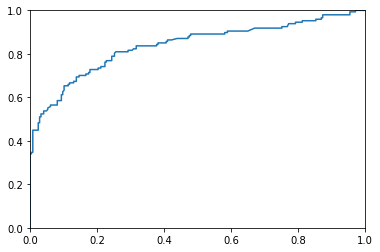

<Figure size 360x360 with 0 Axes>

auc = 0.8382003207787181


In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
# x의 간격
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.figure(figsize = (5,5))
plt.show()

print('auc =', roc_auc_score(y_test, y_pred_proba))

In [ ]:
# 분류 모델의 피처 영향력

feature_name = encoded_data_df.columns.to_list()
feature_name.remove('survived')
feature_name

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'sex_female',
 'sex_male',
 'embarked_C',
 'embarked_Q',
 'embarked_S']

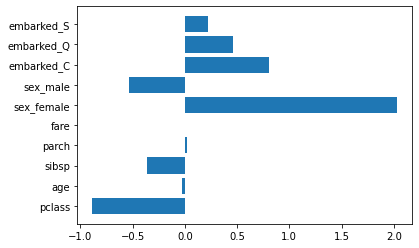

In [ ]:
plt.barh(feature_name, lr.coef_[0])
plt.show()

In [ ]:
# 모델 개선

import pandas as pd
train_df = pd.read_csv('./data/titanic_train.csv')
test_df = pd.read_csv('./data/titanic_test.csv')

data_df = train_df.append(test_df)
train_num = len(train_df)

data_df.drop(['ticket', 'body', 'home.dest'], axis = 1, inplace = True)
age_mean = data_df[data_df['age']>0]['age'].mean()
data_df['age'] = data_df['age'].fillna(age_mean)

embarked_mode = data_df['embarked'].value_counts().index[0]
data_df['embarked'] = data_df['embarked'].fillna(embarked_mode)

data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 392
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1309 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


In [ ]:
# 선실 정보 분석과 처리

data_df['cabin'] = data_df['cabin'].fillna('X')

In [ ]:
data_df['cabin'].value_counts()

X                  1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
B96 B98               4
                   ... 
D34                   1
B36                   1
C50                   1
D50                   1
A21                   1
Name: cabin, Length: 187, dtype: int64

In [ ]:
data_df['cabin'] = data_df['cabin'].apply(lambda x : x[0])

In [ ]:
data_df['cabin'].value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin, dtype: int64

In [ ]:
# G,T를 X에 넣어버리자

data_df['cabin'] = data_df['cabin'].replace({'G' : 'X', 'T' : 'X'})

In [ ]:
data_df['cabin'].value_counts()

X    1020
C      94
B      65
D      46
E      41
A      22
F      21
Name: cabin, dtype: int64

In [ ]:
data_df.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.000000,0,1,19.5000,X,S
1,2,1,"Wells, Miss. Joan",female,4.000000,1,1,23.0000,X,S
2,2,1,"Duran y More, Miss. Florentina",female,30.000000,1,0,13.8583,X,C
3,3,0,"Scanlan, Mr. James",male,29.881138,0,0,7.7250,X,Q
4,3,1,"Bradley, Miss. Bridget Delia",female,22.000000,0,0,7.7250,X,Q


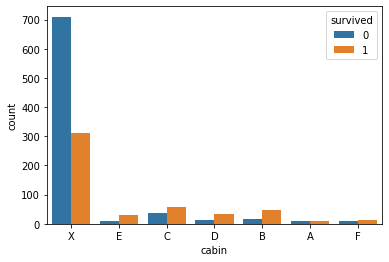

In [ ]:
import seaborn as sns

sns.countplot(x= 'cabin', hue='survived', data = data_df)
plt.show()

In [ ]:
# 승객의 이름 정보
 
data_df['name']

0                 Mellinger, Miss. Madeleine Violet
1                                 Wells, Miss. Joan
2                    Duran y More, Miss. Florentina
3                                Scanlan, Mr. James
4                      Bradley, Miss. Bridget Delia
                           ...                     
388               Karlsson, Mr. Julius Konrad Eugen
389    Ware, Mrs. John James (Florence Louise Long)
390                            O'Keefe, Mr. Patrick
391                                Tobin, Mr. Roger
392                            Daniels, Miss. Sarah
Name: name, Length: 1309, dtype: object

In [ ]:
"Mellinger, Miss. Madeleine Violet".split(",")[1].split(".")[0]

' Miss'

In [ ]:
data_df['name'].apply(lambda x : x.split(",")[1].split(".")[0]).value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Mme               1
 Lady              1
 Jonkheer          1
 Capt              1
 the Countess      1
 Sir               1
 Don               1
 Dona              1
Name: name, dtype: int64

In [ ]:
title_dict = {'A' : ['Ms','Mme', 'Mrs','Dona'], 'B' : ['Miss', 'Mlle', 'Lady'],
              'C' : ['Mr', 'Don'], 'D' : ['Master'],
              'E' : ['Johnkheer', 'the Countess'],
              'F' : ['Rev', 'Col', 'Major','Dr','Capt','Sir']}
def get_title(x):
  title = x.split(", ")[1].split(".")[0]
  for key, value in title_dict.items():
    for t in value:
      if title == t:
        return key
  return 'X'                  

In [ ]:
get_title("Bradley, Miss. Bridget Della")

'B'

In [ ]:
data_df['title'] = data_df['name'].apply(lambda x : get_title(x))

In [ ]:
data_df['title'].value_counts()

C    758
B    263
A    201
D     61
F     24
E      1
X      1
Name: title, dtype: int64

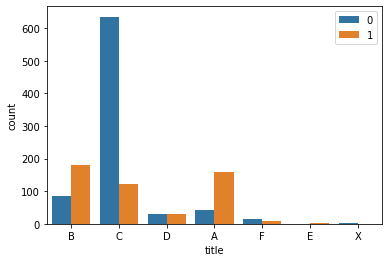

In [ ]:
sns.countplot(x= 'title', hue='survived', data = data_df)
plt.legend(loc='upper right')
plt.show()


In [ ]:
data_df.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,title
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.000000,0,1,19.5000,X,S,B
1,2,1,"Wells, Miss. Joan",female,4.000000,1,1,23.0000,X,S,B
2,2,1,"Duran y More, Miss. Florentina",female,30.000000,1,0,13.8583,X,C,B
3,3,0,"Scanlan, Mr. James",male,29.881138,0,0,7.7250,X,Q,C
4,3,1,"Bradley, Miss. Bridget Delia",female,22.000000,0,0,7.7250,X,Q,B


In [ ]:
data_df.drop(['name'], axis = 1, inplace = True)

In [ ]:
data_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,2,1,female,13.000000,0,1,19.5000,X,S,B
1,2,1,female,4.000000,1,1,23.0000,X,S,B
2,2,1,female,30.000000,1,0,13.8583,X,C,B
3,3,0,male,29.881138,0,0,7.7250,X,Q,C
4,3,1,female,22.000000,0,0,7.7250,X,Q,B


In [ ]:
encoded_data_df = pd.get_dummies(data_df)
encoded_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 392
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   age         1309 non-null   float64
 3   sibsp       1309 non-null   int64  
 4   parch       1309 non-null   int64  
 5   fare        1309 non-null   float64
 6   sex_female  1309 non-null   uint8  
 7   sex_male    1309 non-null   uint8  
 8   cabin_A     1309 non-null   uint8  
 9   cabin_B     1309 non-null   uint8  
 10  cabin_C     1309 non-null   uint8  
 11  cabin_D     1309 non-null   uint8  
 12  cabin_E     1309 non-null   uint8  
 13  cabin_F     1309 non-null   uint8  
 14  cabin_X     1309 non-null   uint8  
 15  embarked_C  1309 non-null   uint8  
 16  embarked_Q  1309 non-null   uint8  
 17  embarked_S  1309 non-null   uint8  
 18  title_A     1309 non-null   uint8  
 19  title_B     1309 non-null   

In [ ]:
train_df = encoded_data_df[:train_num]
test_df = encoded_data_df[train_num:]

x_train = train_df.loc[:, train_df.columns != 'survived'].values
y_train = train_df.loc[:, 'survived'].values

x_test = test_df.loc[:, test_df.columns !='survived'].values
y_test = test_df.loc[:, 'survived'].values


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_pred_proba = lr.predict_proba(x_test)[:, 1]

print(y_test[:10])
print(y_pred[:10])
print(y_pred_proba[:10])

lr.score(x_test, y_test)

[0 1 0 0 0 1 1 1 0 1]
[0 1 0 0 0 1 0 0 0 0]
[0.08045718 0.74362122 0.08276398 0.09646315 0.18010419 0.58978455
 0.42534144 0.39321434 0.09302524 0.09479589]


0.7964376590330788

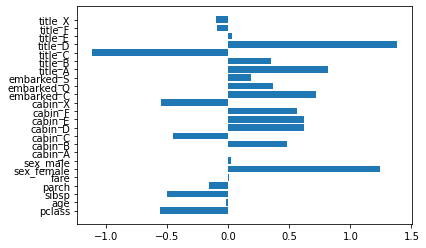

In [ ]:
feature_names = encoded_data_df.columns.to_list()
feature_names.remove('survived')

plt.barh(feature_names, lr.coef_[0])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

comfmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
comfmat

array([[208,  38],
       [ 42, 105]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# sensitivity = recall

print('accuracy_score = %.3f' % accuracy_score(y_true = y_test, y_pred = y_pred))
print('precision_score = %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print('recall_score = %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print('f1_score = %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

accuracy_score = 0.796
precision_score = 0.734
recall_score = 0.714
f1_score = 0.724


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thres = roc_curve(y_test, y_pred_proba)
(fpr, tpr, thres)

(array([0.        , 0.        , 0.        , 0.00406504, 0.00406504,
        0.00813008, 0.00813008, 0.01626016, 0.01626016, 0.02439024,
        0.02439024, 0.02845528, 0.02845528, 0.03252033, 0.03252033,
        0.04471545, 0.04471545, 0.05284553, 0.05284553, 0.05691057,
        0.06097561, 0.06097561, 0.06504065, 0.06504065, 0.08130081,
        0.08130081, 0.08536585, 0.08536585, 0.09349593, 0.09349593,
        0.09756098, 0.09756098, 0.10162602, 0.10162602, 0.10569106,
        0.10569106, 0.12601626, 0.12601626, 0.13821138, 0.13821138,
        0.14227642, 0.14634146, 0.14634146, 0.15853659, 0.15853659,
        0.16666667, 0.16666667, 0.17073171, 0.17073171, 0.17886179,
        0.17886179, 0.18699187, 0.18699187, 0.19512195, 0.19512195,
        0.20325203, 0.20325203, 0.21544715, 0.22357724, 0.23577236,
        0.23577236, 0.2601626 , 0.2601626 , 0.26422764, 0.26422764,
        0.30081301, 0.30081301, 0.36178862, 0.36178862, 0.36585366,
        0.36585366, 0.3699187 , 0.37398374, 0.38

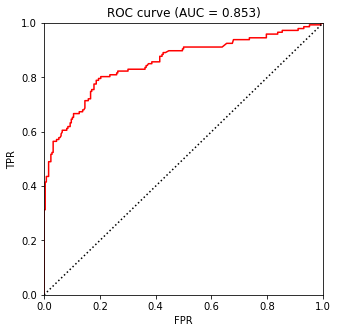

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
plt.plot(fpr, tpr, color = 'r')
plt.plot([0,1], [0,1], 'k:')

# x의 간격
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (AUC = %.3f)' % roc_auc_score(y_test, y_pred_proba))
plt.show()
